# Linear State Space Models


<a id='index-0'></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from quantecon import LinearStateSpace
from scipy.stats import norm
import random

C:\Users\Diogo\Anaconda3\lib\site-packages\numba\np\ufunc\parallel.py:355: NumbaWarning: The TBB threading layer requires TBB version 2019.5 or later i.e., TBB_INTERFACE_VERSION >= 11005. Found TBB_INTERFACE_VERSION = 10005. The TBB threading layer is disabled.
  warnings.warn(problem)


In [2]:
def plot_lss(A,
         C,
         G,
         n=3,
         ts_length=50):

    ar = LinearStateSpace(A, C, G, mu_0=np.ones(n))
    x, y = ar.simulate(ts_length)

    fig, ax = plt.subplots()
    y = y.flatten()
    ax.plot(y, 'b-', lw=2, alpha=0.7)
    ax.grid()
    ax.set_xlabel('time', fontsize=12)
    ax.set_ylabel('$y_t$', fontsize=12)
    plt.show()

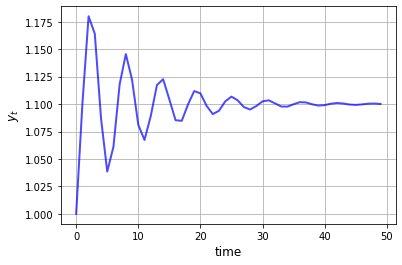

In [3]:
ϕ_0, ϕ_1, ϕ_2 = 1.1, 0.8, -0.8

A = [[1,     0,     0  ],
     [ϕ_0,   ϕ_1,   ϕ_2],
     [0,     1,     0  ]]

C = np.zeros((3, 1))
G = [0, 1, 0]

plot_lss(A, C, G)

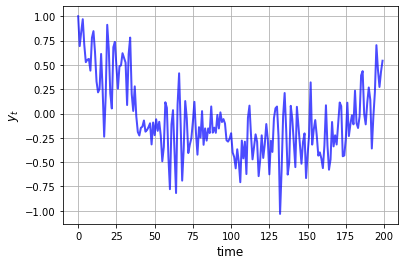

In [4]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.2

A_1 = [[ϕ_1,   ϕ_2,   ϕ_3,   ϕ_4],
       [1,     0,     0,     0  ],
       [0,     1,     0,     0  ],
       [0,     0,     1,     0  ]]

C_1 = [[σ],
       [0],
       [0],
       [0]]

G_1 = [1, 0, 0, 0]

plot_lss(A_1, C_1, G_1, n=4, ts_length=200)

In [5]:
def cross_section_plot(A,
                   C,
                   G,
                   T=20,                 # Set the time
                   ymin=-0.8,
                   ymax=1.25,
                   sample_size = 20,     # 20 observations/simulations
                   n=4):                 # The number of dimensions for the initial x0

    ar = LinearStateSpace(A, C, G, mu_0=np.ones(n))

    fig, axes = plt.subplots(1, 2, figsize=(16, 5))

    for ax in axes:
        ax.grid(alpha=0.4)
        ax.set_ylim(ymin, ymax)

    ax = axes[0]
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel('$y_t$', fontsize=12)
    ax.set_xlabel('time', fontsize=12)
    ax.vlines((T,), -1.5, 1.5)

    ax.set_xticks((T,))
    ax.set_xticklabels(('$T$',))

    sample = []
    for i in range(sample_size):
        rcolor = random.choice(('c', 'g', 'b', 'k'))
        x, y = ar.simulate(ts_length=T+15)
        y = y.flatten()
        ax.plot(y, color=rcolor, lw=1, alpha=0.5)
        ax.plot((T,), (y[T],), 'ko', alpha=0.5)
        sample.append(y[T])

    y = y.flatten()
    axes[1].set_ylim(ymin, ymax)
    axes[1].set_ylabel('$y_t$', fontsize=12)
    axes[1].set_xlabel('relative frequency', fontsize=12)
    axes[1].hist(sample, bins=16, density=True, orientation='horizontal', alpha=0.5)
    plt.show()

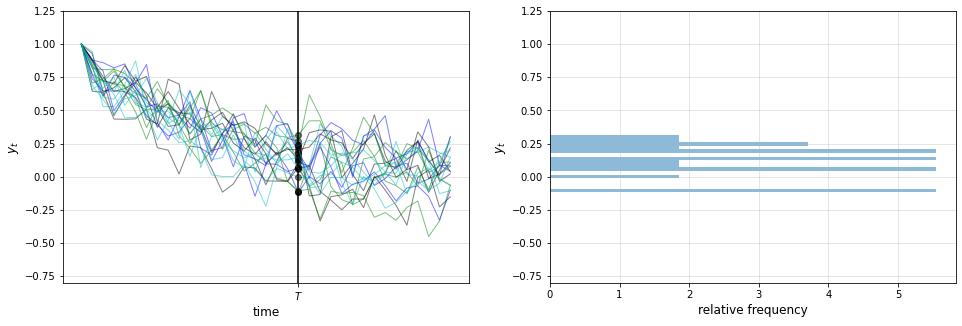

In [6]:
ϕ_1, ϕ_2, ϕ_3, ϕ_4 = 0.5, -0.2, 0, 0.5
σ = 0.1

A_2 = [[ϕ_1, ϕ_2, ϕ_3, ϕ_4],
       [1,     0,     0,     0],
       [0,     1,     0,     0],
       [0,     0,     1,     0]]

C_2 = [[σ], [0], [0], [0]]

G_2 = [1, 0, 0, 0]

cross_section_plot(A_2, C_2, G_2)

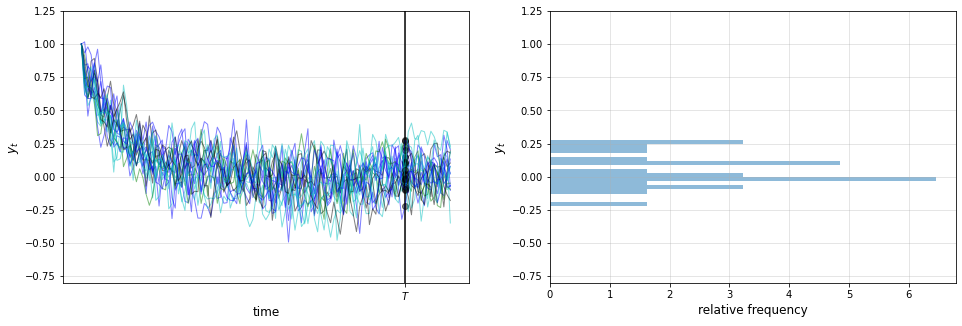

In [7]:
t = 100
cross_section_plot(A_2, C_2, G_2, T=t)

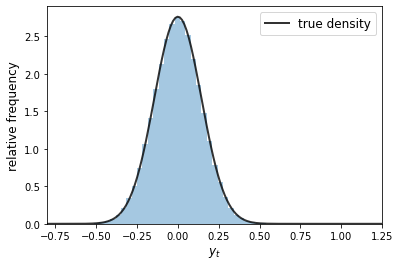

In [8]:
T = 100
ymin=-0.8
ymax=1.25
sample_size = 500_000

ar = LinearStateSpace(A_2, C_2, G_2, mu_0=np.ones(4))
fig, ax = plt.subplots()
x, y = ar.simulate(sample_size)
mu_x, mu_y, Sigma_x, Sigma_y = ar.stationary_distributions()
f_y = norm(loc=float(mu_y), scale=float(np.sqrt(Sigma_y)))
y = y.flatten()
ygrid = np.linspace(ymin, ymax, 150)

ax.hist(y, bins=50, density=True, alpha=0.4)
ax.plot(ygrid, f_y.pdf(ygrid), 'k-', lw=2, alpha=0.8, label=r'true density')
ax.set_xlim(ymin, ymax)
ax.set_xlabel('$y_t$', fontsize=12)
ax.set_ylabel('relative frequency', fontsize=12)
ax.legend(fontsize=12)
plt.show()

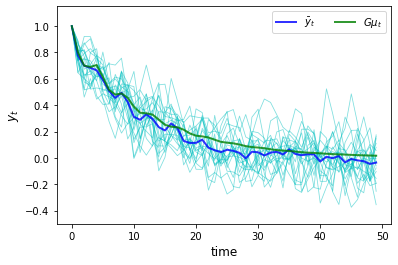

In [9]:
I = 20
T = 50
ymin = -0.5
ymax = 1.15

ar = LinearStateSpace(A_2, C_2, G_2, mu_0=np.ones(4))

fig, ax = plt.subplots()

ensemble_mean = np.zeros(T)
for i in range(I):
    x, y = ar.simulate(ts_length=T)
    y = y.flatten()
    ax.plot(y, 'c-', lw=0.8, alpha=0.5)
    ensemble_mean = ensemble_mean + y

ensemble_mean = ensemble_mean / I
ax.plot(ensemble_mean, color='b', lw=2, alpha=0.8, label='$\\bar y_t$')
m = ar.moment_sequence()

population_means = []
for t in range(T):
    μ_x, μ_y, Σ_x, Σ_y = next(m)
    population_means.append(float(μ_y))

ax.plot(population_means, color='g', lw=2, alpha=0.8, label='$G\mu_t$')
ax.set_ylim(ymin, ymax)
ax.set_xlabel('time', fontsize=12)
ax.set_ylabel('$y_t$', fontsize=12)
ax.legend(ncol=2)
plt.show()

In [10]:
def cross_plot(A,
            C,
            G,
            steady_state='False',
            T0 = 10,
            T1 = 50,
            T2 = 75,
            T4 = 100):

    ar = LinearStateSpace(A, C, G, mu_0=np.ones(4))

    if steady_state == 'True':
        μ_x, μ_y, Σ_x, Σ_y = ar.stationary_distributions()
        ar_state = LinearStateSpace(A, C, G, mu_0=μ_x, Sigma_0=Σ_x)

    ymin, ymax = -0.6, 0.6
    fig, ax = plt.subplots()
    ax.grid(alpha=0.4)
    ax.set_ylim(ymin, ymax)
    ax.set_ylabel('$y_t$', fontsize=12)
    ax.set_xlabel('$time$', fontsize=12)

    ax.vlines((T0, T1, T2), -1.5, 1.5)
    ax.set_xticks((T0, T1, T2))
    ax.set_xticklabels(("$T$", "$T'$", "$T''$"), fontsize=12)
    for i in range(80):
        rcolor = random.choice(('c', 'g', 'b'))

        if steady_state == 'True':
            x, y = ar_state.simulate(ts_length=T4)
        else:
            x, y = ar.simulate(ts_length=T4)

        y = y.flatten()
        ax.plot(y, color=rcolor, lw=0.8, alpha=0.5)
        ax.plot((T0, T1, T2), (y[T0], y[T1], y[T2],), 'ko', alpha=0.5)
    plt.show()

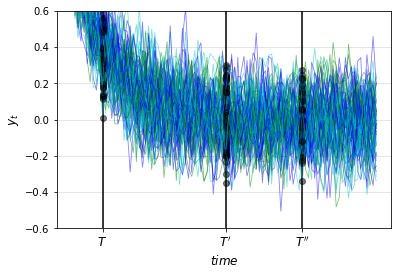

In [11]:
cross_plot(A_2, C_2, G_2)

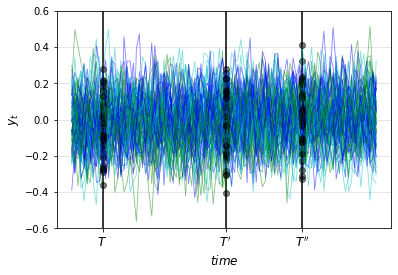

In [12]:
cross_plot(A_2, C_2, G_2, steady_state='True')